<a href="https://colab.research.google.com/github/shkabh/HW3/blob/main/RF_added_HW3_Part2_Linear_Regression___Water_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MULTIVARIATE LINEAR REGRESSION

# 1) read in the data

read in the data on water consumption, I extracted it from https://www.mdpi.com/2079-9276/8/3/156 and saved it in HW3 as water_consumption.csv

We are going back to this problem after we study Classification and Regression Trees and we will try to model this data with an Random Forest

In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUS2024/refs/heads/main/HW3/water_consumption.csv", index_col=0)

In [4]:
df.head()

,Date,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
2010-08-15,2010-08-15,24.336416,6.481994,0.659460,502348.816168,197168.749996,37.706850,2.960570e+06,0.677396,0.640112
2010-08-29,2010-08-29,25.037518,10.852795,0.659460,502348.816168,198457.438148,35.784861,2.965557e+06,5.821554,0.641042
2010-09-12,2010-09-12,25.037518,10.832737,0.659460,502348.816168,198457.438148,41.619670,2.965557e+06,22.124608,0.641042
2010-09-26,2010-09-26,25.037518,12.346707,0.658733,513199.230595,200091.929540,47.335604,2.977833e+06,22.982144,0.641244
2010-10-10,2010-10-10,25.104217,13.063567,0.658733,513199.230595,201419.215320,52.424959,2.977833e+06,75.940850,0.641244


In [5]:
df.tail()

,Date,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
2017-12-24,2017-12-24,26.536655,13.931328,0.701474,673544.243791,227139.808169,55.520244,3.515257e+06,97.724484,0.639987
2018-01-07,2018-01-07,26.536655,14.127310,0.701474,673544.243791,228841.709076,55.520244,3.515257e+06,81.035888,0.639987
2018-01-21,2018-01-21,25.408856,14.127310,0.701474,673544.243791,231684.219375,56.623464,3.515257e+06,75.006428,0.639987
2018-02-04,2018-02-04,25.587114,14.146367,0.701474,673544.243791,233151.979516,63.311737,3.522545e+06,89.526317,0.639014
2018-02-18,2018-02-18,24.500831,14.146367,0.701474,673544.243791,233838.193233,63.311737,3.522545e+06,102.752919,0.639014


the first column is a date. To ensure it as read in _as a date variable_ force a conversion to datetime

In [6]:
# prompt: convert the second column of df to datetime

import pandas as pd
df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'])


In [7]:
#using df.info you get the data type for each feature (=column) - datetime sows as "object"
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 2010-08-15 to 2018-02-18
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   197 non-null    object 
 1   Max_Temperature        197 non-null    float64
 2   Min_Temperature        197 non-null    float64
 3   HDI                    197 non-null    float64
 4   Household_Connections  197 non-null    float64
 5   Water_Consumption      197 non-null    float64
 6   Humidity               197 non-null    float64
 7   Population             197 non-null    float64
 8   Rainfall               197 non-null    float64
 9   Windspeed              197 non-null    float64
dtypes: float64(9), object(1)
memory usage: 21.0+ KB


plot all fratures against Date. Note, to see all plots in a single window I created a 3x4 matrix of axes. First I create a figure of the appropriate size with `plt.figure(figsize=(15, 10))`. Then I populate each subplot with `ax = plt.subplot(3, 4, 1)`: this sets the specific subplot to the axis object called `ax`. The numbre in parenthesis are: the number of axes rows (3), the number of axes columns (4) and the specific subplot number, counted let to right and top to bottom. I put the target variable in the top left (subplot 1) with `ax = plt.subplot(3, 4, 1)`

I want **you** to plot all other variables in the second and third row: start with `ax = plt.subplot(3, 4, 5)` and go through `ax = plt.subplot(3, 4, 12)`, changing the name of the variable to be plotted


# 2) Descriptive statistics


/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0]

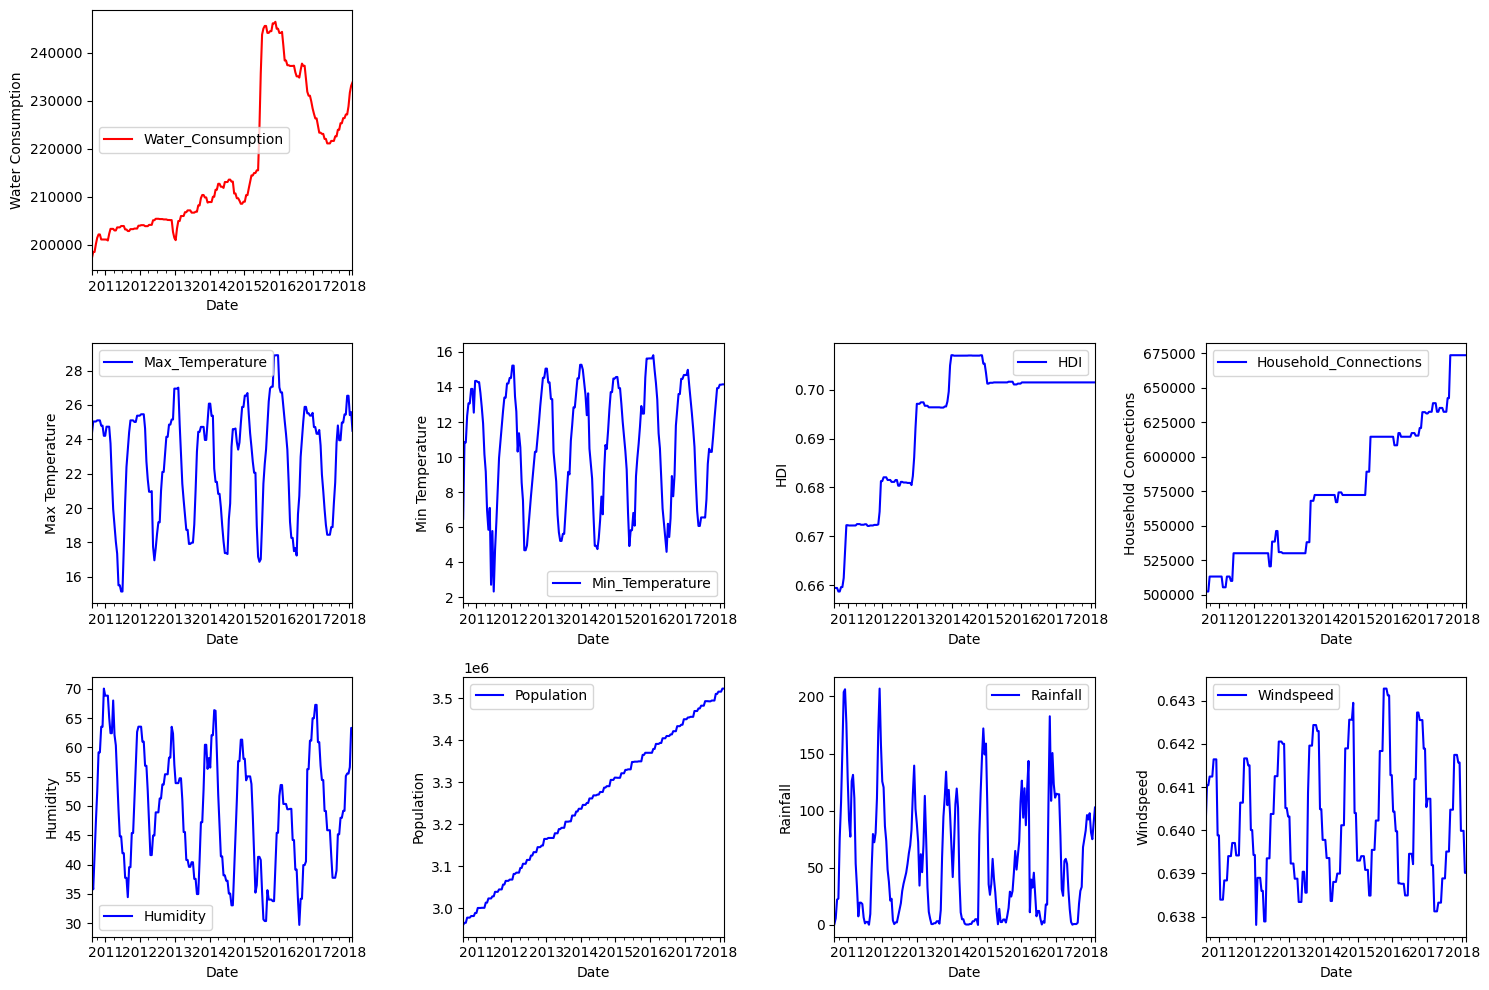

In [8]:
# prompt: plot all fratures against Date

import matplotlib.pyplot as plt

# Plotting all features against Date
plt.figure(figsize=(15, 10))

ax = plt.subplot(3, 4, 1)
df.plot('Date', 'Water_Consumption', ax=ax, color='Red')
plt.xlabel('Date')
plt.ylabel('Water Consumption')

ax = plt.subplot(3, 4, 5)
df.plot('Date', 'Max_Temperature', ax=ax, color='Blue')
plt.xlabel('Date')
plt.ylabel('Max Temperature')

ax = plt.subplot(3, 4, 6)
df.plot('Date', 'Min_Temperature', ax=ax, color='Blue')
plt.xlabel('Date')
plt.ylabel('Min Temperature')

ax = plt.subplot(3, 4, 7)
df.plot('Date', 'HDI', ax=ax, color='Blue')
plt.xlabel('Date')
plt.ylabel('HDI')

ax = plt.subplot(3, 4, 8)
df.plot('Date', 'Household_Connections', ax=ax, color='Blue')
plt.xlabel('Date')
plt.ylabel('Household Connections')

ax = plt.subplot(3, 4, 9)
df.plot('Date', 'Humidity', ax=ax, color='Blue')
plt.xlabel('Date')
plt.ylabel('Humidity')

ax = plt.subplot(3, 4, 10)
df.plot('Date', 'Population', ax=ax, color='Blue')
plt.xlabel('Date')
plt.ylabel('Population')

ax = plt.subplot(3, 4, 11)
df.plot('Date', 'Rainfall', ax=ax, color='Blue')
plt.xlabel('Date')
plt.ylabel('Rainfall')

ax = plt.subplot(3, 4, 12)
df.plot('Date', 'Windspeed', ax=ax, color='Blue')
plt.xlabel('Date')
plt.ylabel('Windspeed')

plt.tight_layout()
plt.show()


CAPTION: The graphs above show the change in the maximum temperature (°C), minimum temperature (°C), Human Development Index (HDI), household connections, humidity, population, rainfall, and windspeed every 2 weeks between 8/15/2010 and 2/18/18.

## Describe Data

In [9]:
# use the method describe to see the statistical properties of the dataframe
df.describe()

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,1.970000e+02,197.000000,197.000000
mean,22.820151,10.755184,0.693206,575469.302905,216086.151748,49.327576,3.253261e+06,56.300944,0.640164
std,3.214211,3.450827,0.013474,48696.828622,14132.209414,10.165083,1.627993e+05,52.049954,0.001396
min,15.146338,2.336682,0.658733,502348.816168,197168.749996,29.708175,2.960570e+06,-0.031489,0.637809
25%,20.275245,7.596494,0.681300,530077.653037,204110.307828,40.525643,3.115161e+06,7.538785,0.639014
50%,23.964625,11.355749,0.701456,572273.709141,210313.350617,49.408814,3.268602e+06,40.916367,0.639882
75%,25.104217,13.930920,0.701474,614469.765245,226332.627614,57.033724,3.390970e+06,96.142387,0.641277
max,28.896027,15.808946,0.707032,673544.243791,246476.038257,70.025291,3.522545e+06,206.857482,0.643281



## Distributions

Plot a histogram of each feature separately. Comment on the distributions: e.g., which are bell shaped, which are multi-peaked, anything you think is notable

Text(0.5, 1.0, 'Windspeed')

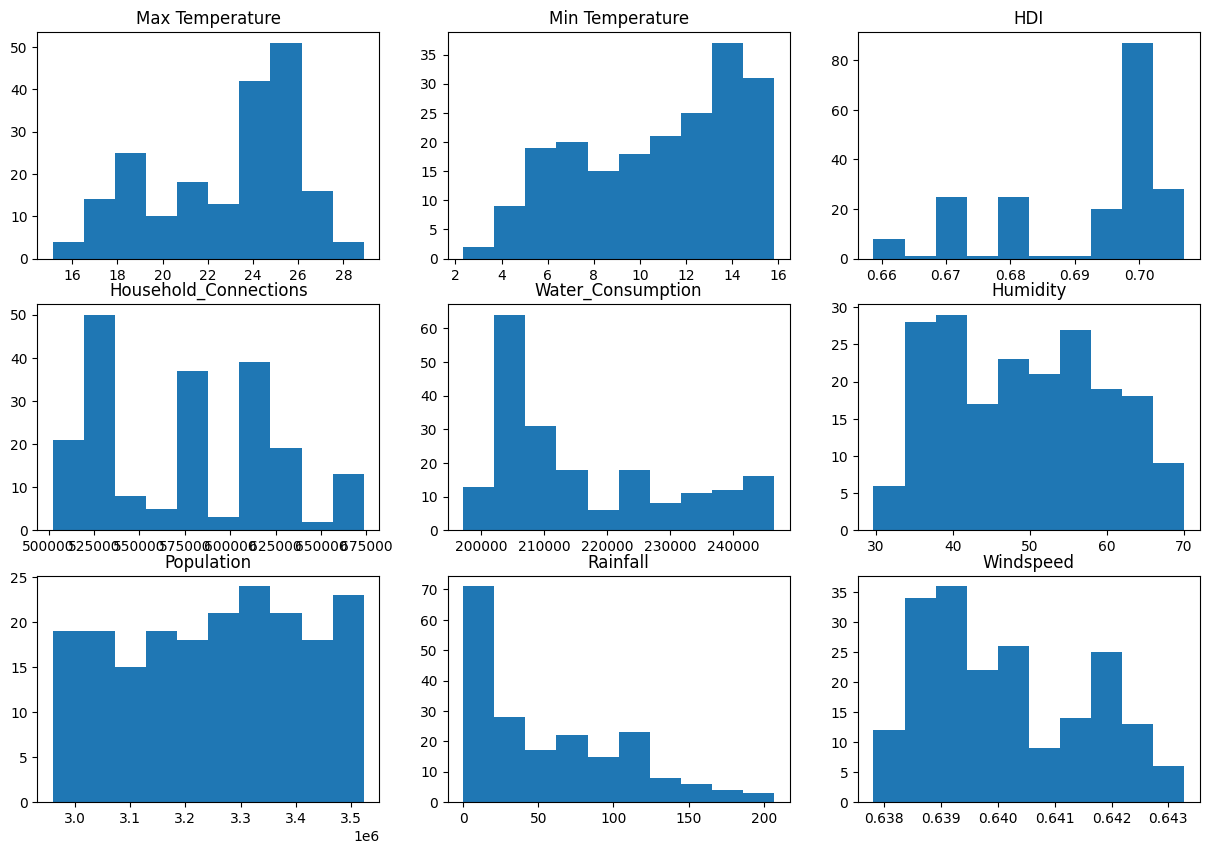

In [10]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1).hist(df['Max_Temperature'])
plt.title('Max Temperature')

plt.subplot(3, 3, 2).hist(df['Min_Temperature'])
plt.title('Min Temperature')

plt.subplot(3, 3, 3).hist(df['HDI'])
plt.title('HDI')

plt.subplot(3, 3, 4).hist(df['Household_Connections'])
plt.title('Household_Connections')

plt.subplot(3, 3, 5).hist(df['Water_Consumption'])
plt.title('Water_Consumption')

plt.subplot(3, 3, 6).hist(df['Humidity'])
plt.title('Humidity')

plt.subplot(3, 3, 7).hist(df['Population'])
plt.title('Population')

plt.subplot(3, 3, 8).hist(df['Rainfall'])
plt.title('Rainfall')

plt.subplot(3, 3, 9).hist(df['Windspeed'])
plt.title('Windspeed')


### CAPTION: The histograms describe the distribution of values of the maximum temperature, minimum temperature, HDI, household connections, water consumption, humidity, population, rainfall, and windspeed. The water consumption and rainfall plots are left skewed. The minimum temperature, maximum temperature, and HDI plots are right skewed. The household connections and windspeed plots have multiple peaks. There is no pattern in the popultion plot; it is mostly constant. The humidity plot is the closest plot to being bell-curved, but it also seems like it has multiple peaks.

# 3) Exploratory data analysis

Look at the correlation of the variables, pay attention to what is linearly correlatefd with the Water Consumption. If we had a single variable with high linear correlation with the target, we could try a univariate linear regression.

In [11]:
df.iloc[:,1:].corr()

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
Max_Temperature,1.000000,0.894710,0.042989,0.136172,0.160549,0.335020,0.098926,0.588840,0.494267
Min_Temperature,0.894710,1.000000,0.025292,0.064923,0.055879,0.643721,0.037800,0.758492,0.288344
HDI,0.042989,0.025292,1.000000,0.714116,0.594874,-0.207362,0.834549,-0.136051,-0.024970
Household_Connections,0.136172,0.064923,0.714116,1.000000,0.811606,-0.177808,0.961420,-0.046897,0.096903
Water_Consumption,0.160549,0.055879,0.594874,0.811606,1.000000,-0.312399,0.793164,-0.064579,0.171201
Humidity,0.335020,0.643721,-0.207362,-0.177808,-0.312399,1.000000,-0.193239,0.723015,-0.143531
Population,0.098926,0.037800,0.834549,0.961420,0.793164,-0.193239,1.000000,-0.087344,0.044513
Rainfall,0.588840,0.758492,-0.136051,-0.046897,-0.064579,0.723015,-0.087344,1.000000,0.262433
Windspeed,0.494267,0.288344,-0.024970,0.096903,0.171201,-0.143531,0.044513,0.262433,1.000000


### CAPTION: From the table above, we can see that the variables HDI (0.5949), Household_Connections (0.8116), and Population (0.7932) have a high linear correlation with the variable Water_Consumption.

QUESTION (answer here) - can you guess what the maximum result with can get with unvariate linear regression based on the correlation result and the model's R^2? _hint_ https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide-2.php#:~:text=What%20is%20the%20Coefficient%20of,0.6%20x%200.6%20%3D%200.36).

ANSWER - The maximum result we can get with the univariate linear regression is 0.6587. When looking at the correlation results, Household_Connections has the highest result at 0.8116. To find the R^2, we have to do (0.8116)(0.8116) which equals 0.6587.

# 3) Linear Regression
error

## 3A) Univariate model

Start with a univariate linear regression, choose the variable with the highest coefficient. Choose whichever model you prefer.

In [12]:
# _your code here_
import statsmodels.api as sm

y = df['Water_Consumption']
X = df['Household_Connections']

model_univariate = sm.OLS(X, y)

prediction = model_univariate.predict(X, y)
# make the prediction of the model based on the full input dataset (X)

ValueError: x and y must have same first dimension, but have shapes (197,) and (1,)

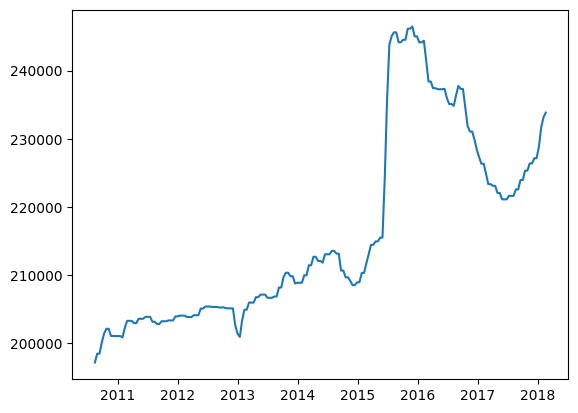

In [17]:
import pylab as plt
plt.plot(df['Date'], y)
plt.plot(df['Date'], prediction, 'r.')
plt.xlabel('Date')
plt.ylabel('Water Consumption')


### CAPTION HERE

#3B) multivariate model with statsmodels

One method for linear regression is the statsmodels Ordinary Least Square. I made the model below. Look at the P>|t| column of the report. NOTE: that represents the probability that "by chance" the variable would have that influence on the model, even if it did not explain the independent variable.

In [18]:
# prompt: multilinear regression with all variables in the dataframe except data witih water consumption as endogenous variable

import statsmodels.formula.api as smf

# Define the formula for the regression
formula = 'Water_Consumption ~ Max_Temperature + Min_Temperature + HDI + Household_Connections + Humidity + Population + Rainfall + Windspeed'

# Fit the model
model = smf.ols(formula, data=df).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Water_Consumption   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     63.85
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           1.47e-49
Time:                        20:26:21   Log-Likelihood:                -2032.3
No. Observations:                 197   AIC:                             4083.
Df Residuals:                     188   BIC:                             4112.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.818e+

look at the R^2 above, and at the P>|t|, what do they represent?

Assiming a p-value of 0.05, report in a cell of text below _which variables are significant in the fit_:


The R^2 value represents the strength of the model. The R^2 value is high, so this model is a good fit.

The P > |t| represents the p-value of the significance test. If p < .05, Max_Temperature, Min_Temperature, HDI, Household_Connections, Humidity, and Population are significant in the fit.

# 3C) Now use sklearn like in class and lets do things right! training-test split!


### 3C - 1)
First select the numerical columns and store them in a list called numerical_features

In [19]:
# prompt: whiten the dataframe
df['Max_Temperature'].replace(' ', '')
df['Min_Temperature'].replace(' ', '')
df['HDI'].replace(' ', '')
df['Household_Connections'].replace(' ', '')
df['Water_Consumption'].replace(' ', '')
df['Humidity'].replace(' ', '')
df['Population'].replace(' ', '')
df['Rainfall'].replace(' ', '')
df['Windspeed'].replace(' ', '')

# Select the numerical features
numerical_features = ['Max_Temperature','Min_Temperature','HDI','Household_Connections','Water_Consumption', 'Humidity', 'Population', 'Rainfall', 'Windspeed']
numerical_features


['Max_Temperature',
 'Min_Temperature',
 'HDI',
 'Household_Connections',
 'Water_Consumption',
 'Humidity',
 'Population',
 'Rainfall',
 'Windspeed']

### 3C - 2) standardize the features

NOTE THE NUMERICAL FEATURES: they live in very different regimes! for example household connections ins in the ~100,000, while wind speed is ~0.1.

Before modeling the data with a linear regression it is apprioriate to STANDARDIZE the features: subtracting the mean and dividing by the standard deviation, so that they are mean=0 std=1. Note: this does not change the **shape** of the distribution, it just translates it and shrinks it

Thankfully, sklearn offers a library of functions for preprocessing the data: standardize the features with sklearn StandardScaler. Like all sklearn functions, first create an object, then fit it to the data

In [20]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features
scaler.fit(df[numerical_features])
#scaler.fit(df_copy)

StandardScaler().fit(df[numerical_features])
#StandardScaler().fit(df_copy)

StandardScaler()

to generate the scaled features transform the original feature set

In [21]:
scaled_features = scaler.fit_transform(df[numerical_features])
#scaled_features = scaler.fit_transform(df_copy)

scaled_features

array([[ 0.47293977, -1.24146403, -2.51082218, ..., -1.80243935,
        -1.07137969, -0.03718638],
       [ 0.69162118,  0.02835829, -2.51082218, ..., -1.77172968,
        -0.97229672,  0.63119909],
       [ 0.69162118,  0.02253108, -2.51082218, ..., -1.77172968,
        -0.65827933,  0.63119909],
       ...,
       [ 0.80744552,  0.97968328,  0.61521731, ...,  1.6134208 ,
         0.36029122, -0.12687215],
       [ 0.86304614,  0.98521971,  0.61521731, ...,  1.65830416,
         0.6399626 , -0.82569644],
       [ 0.52422241,  0.98521971,  0.61521731, ...,  1.65830416,
         0.89472364, -0.82569644]])

save the features in a new dataset

In [22]:
df_copy = df.copy()
# Transform the numerical features
df_copy[numerical_features] = scaler.transform(df[numerical_features])

# Print the whitened DataFrame
df_copy

,Date,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
2010-08-15,2010-08-15 00:00:00,0.472940,-1.241464,-2.510822,-1.505371,-1.342012,-1.146113,-1.802439,-1.071380,-0.037186
2010-08-29,2010-08-29 00:00:00,0.691621,0.028358,-2.510822,-1.505371,-1.250592,-1.335672,-1.771730,-0.972297,0.631199
2010-09-12,2010-09-12 00:00:00,0.691621,0.022531,-2.510822,-1.505371,-1.250592,-0.760205,-1.771730,-0.658279,0.631199
2010-09-26,2010-09-26 00:00:00,0.691621,0.462375,-2.564927,-1.281987,-1.134640,-0.196461,-1.696137,-0.641762,0.775965
2010-10-10,2010-10-10 00:00:00,0.712425,0.670640,-2.564927,-1.281987,-1.040482,0.305484,-1.696137,0.378289,0.775965
...,...,...,...,...,...,...,...,...,...,...
2017-12-24,2017-12-24 00:00:00,1.159218,0.922746,0.615217,2.019122,0.784153,0.610762,1.613421,0.797870,-0.126872
2018-01-07,2018-01-07 00:00:00,1.159218,0.979683,0.615217,2.019122,0.904887,0.610762,1.613421,0.476426,-0.126872
2018-01-21,2018-01-21 00:00:00,0.807446,0.979683,0.615217,2.019122,1.106537,0.719569,1.613421,0.360291,-0.126872
2018-02-04,2018-02-04 00:00:00,0.863046,0.985220,0.615217,2.019122,1.210660,1.379210,1.658304,0.639963,-0.825696


Plot a histogram of each feature _after_ standardizing compare it to the plot above: is the shape the same? it sholud be identical! but the x-axis should be different

Text(0.5, 1.0, 'Windspeed')

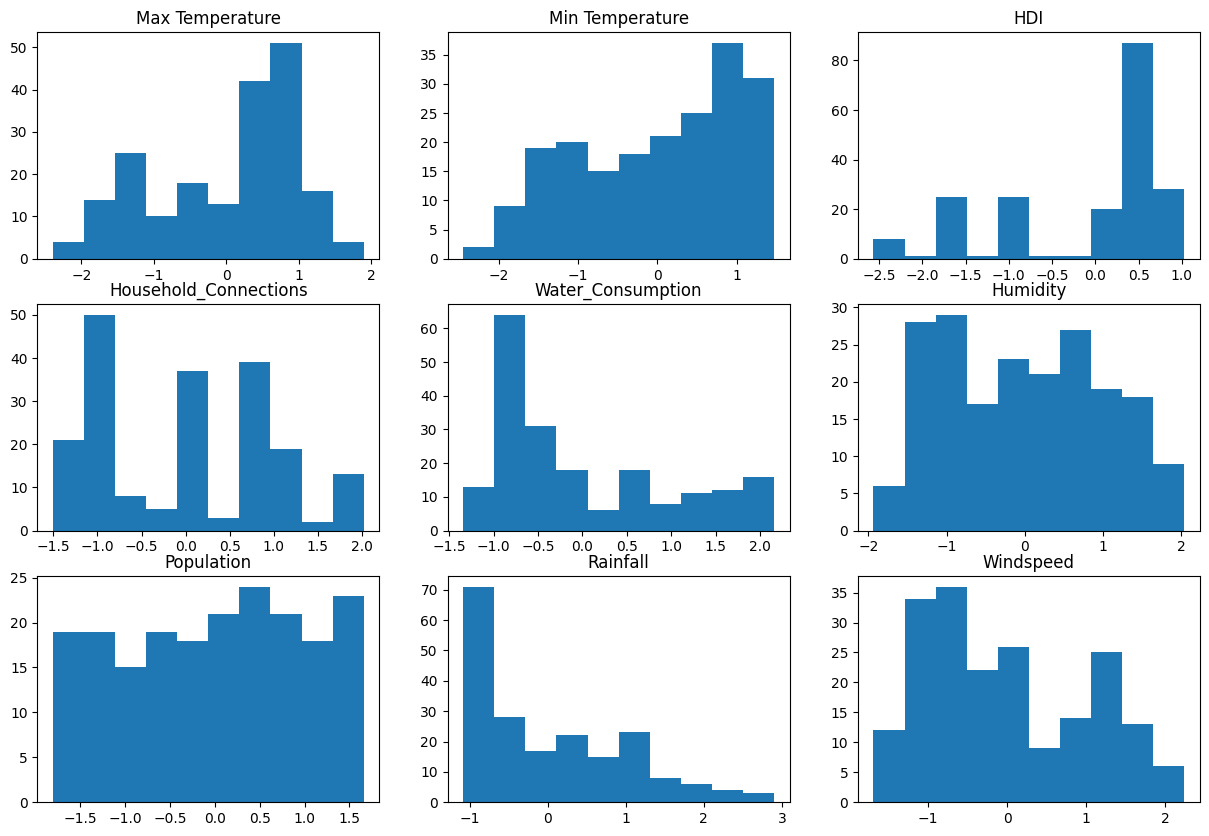

In [23]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1).hist(df_copy['Max_Temperature'])
plt.title('Max Temperature')

plt.subplot(3, 3, 2).hist(df_copy['Min_Temperature'])
plt.title('Min Temperature')

plt.subplot(3, 3, 3).hist(df_copy['HDI'])
plt.title('HDI')

plt.subplot(3, 3, 4).hist(df_copy['Household_Connections'])
plt.title('Household_Connections')

plt.subplot(3, 3, 5).hist(df_copy['Water_Consumption'])
plt.title('Water_Consumption')

plt.subplot(3, 3, 6).hist(df_copy['Humidity'])
plt.title('Humidity')

plt.subplot(3, 3, 7).hist(df_copy['Population'])
plt.title('Population')

plt.subplot(3, 3, 8).hist(df_copy['Rainfall'])
plt.title('Rainfall')

plt.subplot(3, 3, 9).hist(df_copy['Windspeed'])
plt.title('Windspeed')


### CAPTION: The histograms describe the distribution of values of the maximum temperature, minimum temperature, HDI, household connections, water consumption, humidity, population, rainfall, and windspeed. Unlike the previous set of plots, the x-axis on these plots are standardized to have proportionate values to each other.

look at the statistical properties of this new dataset with the method `describe`. Do they make sense?

In [24]:
df_copy.describe()


,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
count,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02
mean,-5.906161e-16,-4.756488e-16,-3.678952e-15,7.934995e-16,-5.770905e-16,5.049542e-16,1.154181e-15,-8.115336e-17,-4.057668e-15
std,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00
min,-2.393547e+00,-2.445776e+00,-2.564927e+00,-1.505371e+00,-1.342012e+00,-1.934995e+00,-1.802439e+00,-1.085034e+00,-1.691723e+00
25%,-7.937844e-01,-9.176750e-01,-8.858643e-01,-9.345023e-01,-8.495739e-01,-8.681048e-01,-8.504396e-01,-9.392207e-01,-8.256964e-01
50%,3.569740e-01,1.744785e-01,6.138774e-01,-6.578941e-02,-4.095261e-01,8.012208e-03,9.447330e-02,-2.963264e-01,-2.026068e-01
75%,7.124252e-01,9.226273e-01,6.152173e-01,8.029235e-01,7.268914e-01,7.600314e-01,8.480413e-01,7.673965e-01,7.994209e-01
max,1.895133e+00,1.468239e+00,1.028777e+00,2.019122e+00,2.155878e+00,2.041346e+00,1.658304e+00,2.899909e+00,2.239020e+00


### 3C - 3) TRAIN-TEST SPLIT to avoid overfitting



In [25]:
# prompt: multilinear regression with all variables in the dataframe except data witih water consumption as endogenous variable with sklearn
from sklearn.model_selection import train_test_split

# Select the features (independent variables)
#vars = numerical_features
vars = ['Max_Temperature', 'Min_Temperature', 'HDI', 'Household_Connections', 'Humidity', 'Population', 'Rainfall', 'Windspeed']
#max, min, hdi houshold connection, humidity, pop, rain, wind
X1 = df_copy[vars]

# Select the target variable (dependent variable)
y = df_copy['Water_Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y)


### 3C -4) NOW FIT THE DATA WITH THE sklearn LinearRegression model

In [26]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model_multivariate = LinearRegression()

# Fit the model to the training data
'''X_train.shape
X_train = np.array(X_train).reshape(-1, 1)
y_train.shape
y_train = np.array(y_train).reshape(-1, 1)'''
model1 = model_multivariate.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test = model_multivariate.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the coefficients and intercept
print("Coefficients:", list(zip(vars, model1.coef_)))
print("Intercept:", model1.intercept_)


Mean Squared Error: 0.32589377456089125
R-squared: 0.5515222664144328
Coefficients: [('Max_Temperature', -0.2726029527743152), ('Min_Temperature', 0.5354913791602877), ('HDI', -0.21456086088362822), ('Household_Connections', 0.47847408420770887), ('Humidity', -0.5560887338961629), ('Population', 0.45660855087582547), ('Rainfall', 0.09512248556236022), ('Windspeed', -0.009629436414846232)]
Intercept: 0.06610279570361834


### 3C-5 Visualize the model

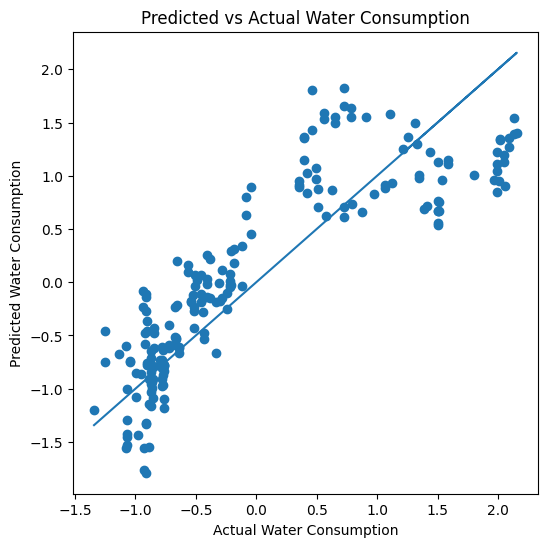

In [27]:
# prompt: plot predicted vs actual water_consumption based on sklearn model

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
# Plot predicted vs actual water consumption
plt.scatter(y, model_multivariate.predict(X1))
plt.xlabel("Actual Water Consumption")
plt.ylabel("Predicted Water Consumption")
plt.title("Predicted vs Actual Water Consumption")
plt.plot(y, y)
plt.show()


CAPTION: This graph is a scatter plot that overlays the predictive line over a scatter plot of the actual values from the data set.

*This is suspiciously accurate; something may have gone wrong in the analysis, but I cannot tell where.

Text(0, 0.5, 'Water Consumption')

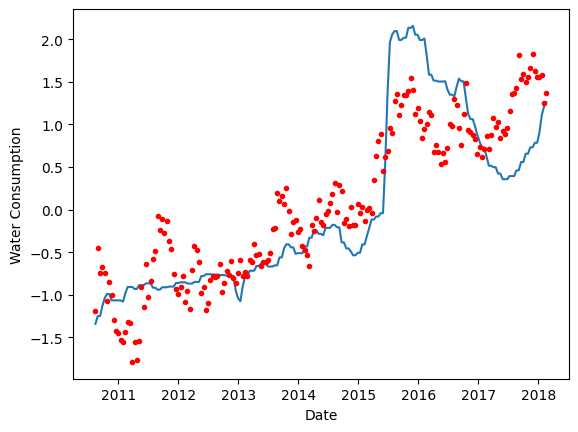

In [28]:
plt.plot(df['Date'], y)
plt.plot(df['Date'], model1.predict(X1), 'r.')
plt.xlabel('Date')
plt.ylabel('Water Consumption')

CAPTION: This graph is a scatter plot that overlays the predictive line over a scatter plot of the actual values from the data set.

## 3D) SIMPLIFY THE MODEL
 You can simplify the model! this is what they did in  https://www.mdpi.com/2079-9276/8/3/156



### 3D - 1) Only use the columns that have a correlation higher than 0.5  $r>0.5$ with Water_consumption

In [29]:
df_copy.iloc[:,1:].corr() > 0.5

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
Max_Temperature,True,True,False,False,False,False,False,True,False
Min_Temperature,True,True,False,False,False,True,False,True,False
HDI,False,False,True,True,True,False,True,False,False
Household_Connections,False,False,True,True,True,False,True,False,False
Water_Consumption,False,False,True,True,True,False,True,False,False
Humidity,False,True,False,False,False,True,False,True,False
Population,False,False,True,True,True,False,True,False,False
Rainfall,True,True,False,False,False,True,False,True,False
Windspeed,False,False,False,False,False,False,False,False,True


In [30]:
vars2 = ['HDI', 'Household_Connections', 'Population'] #you can do this programmatically using the result of the code above, or just read out the variable corelation and typing the names of the variables in a list here

### 3D - 2) redo a multivariate fit with sklearn, just like above

In [31]:
X2 = df_copy[vars2]

# Select the target variable (dependent variable)
y = df_copy['Water_Consumption']

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y)

# Create a Linear Regression model
model_multivariate_restricted = LinearRegression()

# Fit the model to the training data
model2= model_multivariate_restricted.fit(X2_train, y2_train)

# Make predictions on the testing data
y2_pred_test = model_multivariate_restricted.predict(X2_test)

# Evaluate the model
mse2 = mean_squared_error(y2_test, y2_pred_test)
r22 = r2_score(y2_test, y2_pred_test)

# Print the coefficients and intercept
print("Coefficients:", list(zip(vars2, model2.coef_)))
print("Intercept:", model2.intercept_)

Coefficients: [('HDI', -0.1280358822414259), ('Household_Connections', 0.4432409029972729), ('Population', 0.4567952538153026)]
Intercept: -0.030178408215328516


# 3D - 3) plot the model predictions, just like above

Text(0, 0.5, 'Water Consumption')

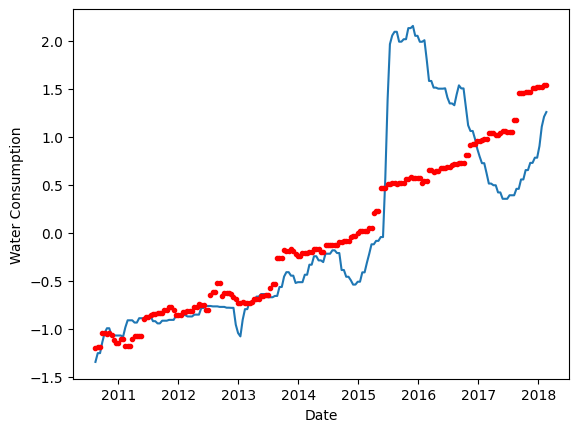

In [32]:
plt.plot(df['Date'], y)
plt.plot(df['Date'], model_multivariate_restricted.predict(X2), 'r.')
plt.xlabel('Date')
plt.ylabel('Water Consumption')

### This graph overlays the multivariate restricted predictive model over top of the data points for water consumption that were collected between 2010 and 2018.

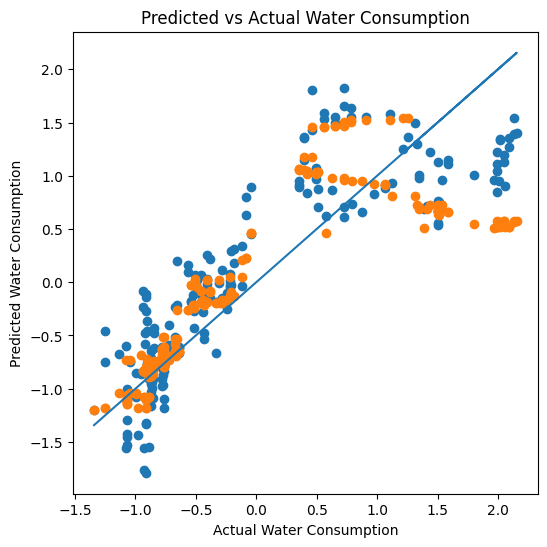

In [33]:
plt.figure(figsize=(6, 6))
# Plot predicted vs actual water consumption
#plt.scatter(y, model_multivariate_restricted.predict(X1))
plt.scatter(y, model_multivariate.predict(X1))
plt.scatter(y, model_multivariate_restricted.predict(X2))
plt.xlabel("Actual Water Consumption")
plt.ylabel("Predicted Water Consumption")
plt.title("Predicted vs Actual Water Consumption")
plt.plot(y, y)
plt.show()


### This plot shows the predicted vs actual water consumption data.

Which model is better?

I think the model_multivariate_restricted model is better because the multivariate models had a higher R^2 value.

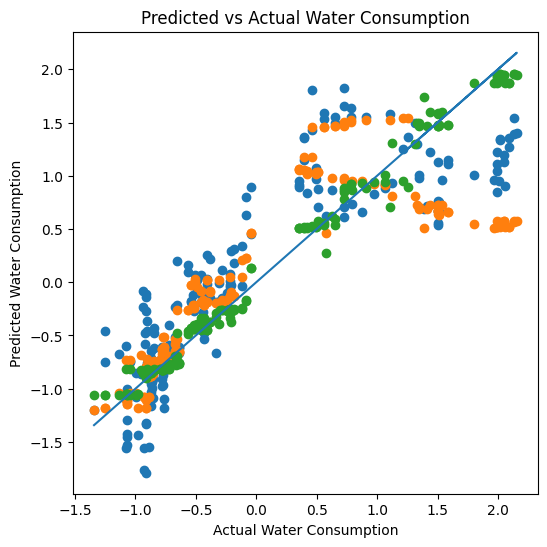

In [40]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, max_depth = 3, random_state = 22)

model3 = model.fit(X_train, y_train)

plt.figure(figsize=(6, 6))
# Plot predicted vs actual water consumption
#plt.scatter(y, model_multivariate_restricted.predict(X1))
plt.scatter(y, model_multivariate.predict(X1))
plt.scatter(y, model_multivariate_restricted.predict(X2))
plt.xlabel("Actual Water Consumption")
plt.ylabel("Predicted Water Consumption")
plt.title("Predicted vs Actual Water Consumption")
plt.plot(y, y)

plt.scatter(y, model3.predict(X1))

plt.show()